# **Wine Quality Prediction**

By Team **UNIQUE**

In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Downloading the packages
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
import scipy.stats
import numpy as np
import seaborn
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
from collections import Counter
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()  
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import  ExtraTreesClassifier

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import keras
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import keras.utils
from keras import utils as np_utils
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
from scikitplot.metrics import plot_roc_curve
from sklearn.metrics import classification_report ,  accuracy_score
from sklearn.metrics import RocCurveDisplay

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, balanced_accuracy_score

In [ ]:
#Reading the dataset
data_red=pd.read_csv('/content/winequality-red.csv',low_memory=False, sep=';')
data_white=pd.read_csv('/content/winequality-white.csv',low_memory=False, sep=';')

In [ ]:
data_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
data_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
TARGET = 'quality'

In [ ]:
data_red[TARGET].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
data_red.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
data_white.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [ ]:
wsd = [0.32, 0.4, 0.52, 0.55, 0.6, 0.56, 0.6, 0.62, 0.74, 0.77, 0.88]
a=-0.08
b=-0.1
axw=0.05
bxw=.008

In [ ]:
rsd = [0.34, 0.49, 0.52, 0.55, 0.6, 0.6, 0.65, 0.7, 0.74, 0.77, 0.88]
axr=-0.12
bxr=-0.12
aaxr=0.04
bbxr=0.01

In [ ]:
def call(functionToCall):
  print('Red Wine')
  functionToCall(data_red)
  print('White Wine')
  functionToCall(data_white)

In [ ]:
my_color = (69/255, 120/255, 222/255, 0.6)

**Unbalanced or raw dataset for both red wine and white wine**

Red Wine


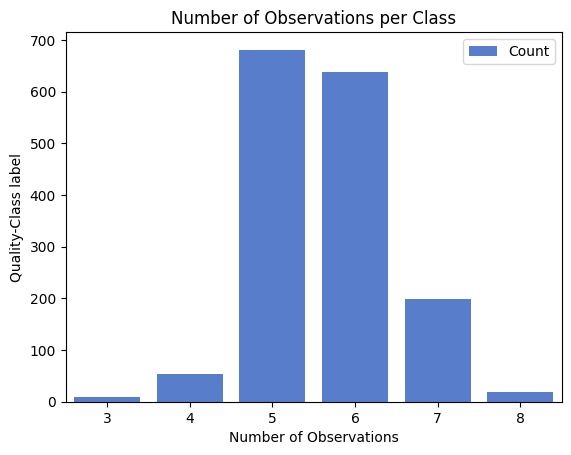

White Wine


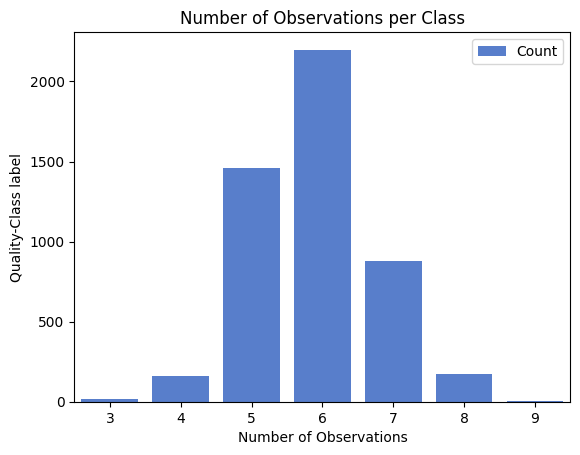

In [ ]:
# Plotting the graph for unbalanced or raw dataset for both red wine and white wine
def countplots(wine_set):
    wine_set[TARGET] = pd.Categorical(wine_set[TARGET])
    seaborn.countplot(x=TARGET, data=wine_set,color=my_color)
    plt.title("Number of Observations per Class")
    plt.xlabel("Number of Observations")
    plt.ylabel("Quality-Class label")
    plt.legend(['Count'])
    plt.show()

call(countplots)

# **Red** **Wine**

In [ ]:
Xred = data_red[['fixed acidity',
                'volatile acidity',
               'citric acid',
               'residual sugar',
                'chlorides',
               'free sulfur dioxide',
               'total sulfur dioxide',
               'density',
               'pH',
               'sulphates',
               'alcohol']]

yred = data_red['quality'] 

In [ ]:
# Prepare the input and output variables
xred = data_red.drop(['quality'], axis=1).values
yred = data_red[['quality']].values

In [ ]:
Xred_train, Xred_test, yred_train, yred_test = train_test_split(xred, yred, test_size=0.15, random_state=0)

In [ ]:
scalerred = StandardScaler()
Xred_train_scl = scaler.fit_transform(Xred_train)
Xred_test_scl = scaler.transform(Xred_test)

**Balancing the red wine dataset using SMOTE**

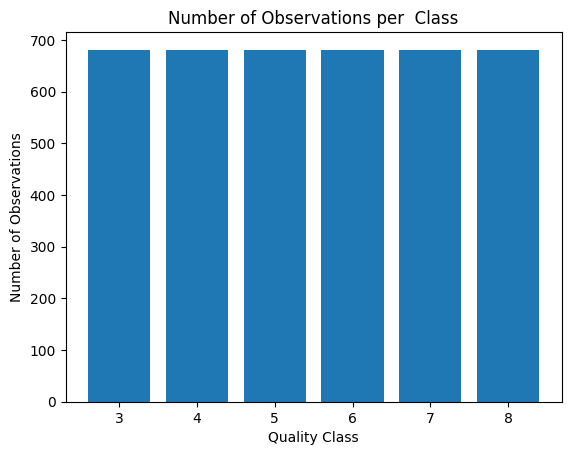

In [ ]:
# Separate the target variable and the features
X__red = data_red.drop('quality', axis=1)
y__red = data_red['quality']

# Instantiate the SMOTE algorithm
smotered = SMOTE(random_state=42)

# Fit and apply SMOTE to the data
X_resampled_red, y_resampled_red = smotered.fit_resample(X__red, y__red)

# Count the number of samples per class after SMOTE
counts_red = y_resampled_red.value_counts()

# Create a bar plot
plt.bar(counts_red.index, counts_red.values)

# Set the plot title, x and y labels, and legend
plt.title("Number of Observations per  Class")
plt.xlabel("Quality Class")
plt.ylabel("Number of Observations")
plt.xticks(counts_red.index)

# Show the plot for Balanced data
plt.show()

**Feature selection for Red wine dataset**

Text(0.5, 1.0, 'Red Wine Correlation Heatmap')

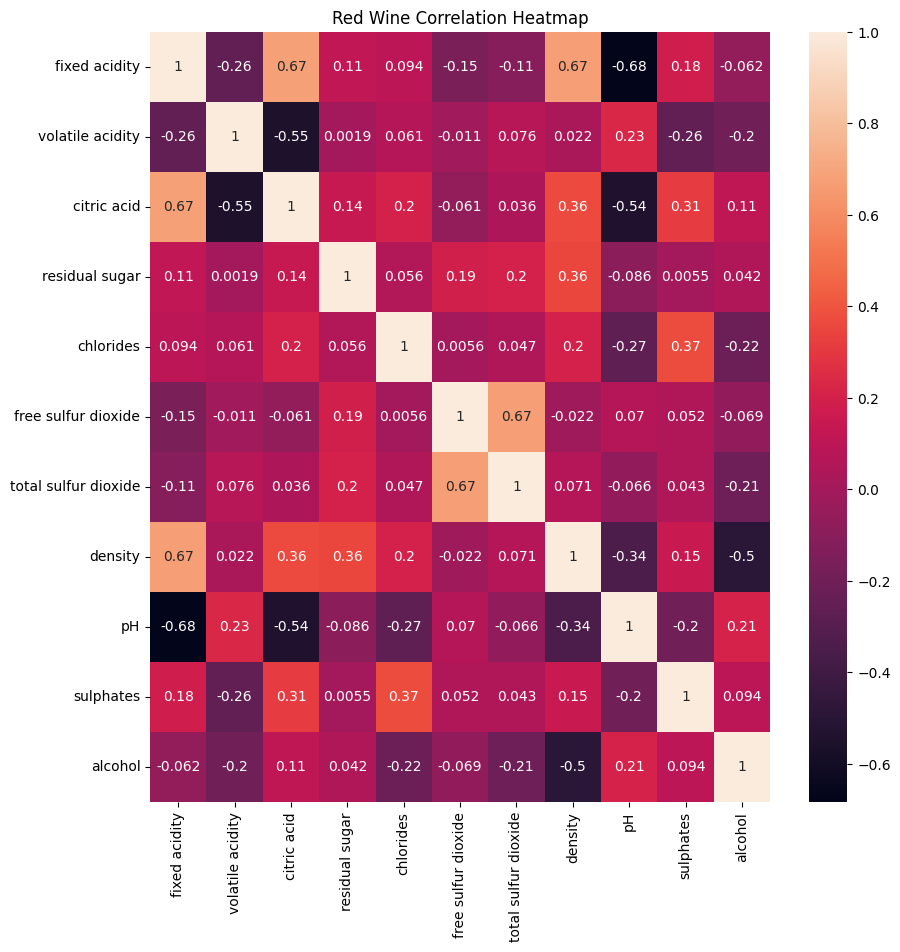

In [ ]:
corr = data_red.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr,annot=True,ax=ax)
plt.title("Red Wine Correlation Heatmap")

**SVM Model for Red wine dataset**

In [ ]:
# Define the SVM model
svm_modelred = SVC(C=1.0,
              kernel='rbf',
              degree=3, 
              gamma='auto',
              coef0=0.0, shrinking=True,
              probability=False,
              tol=0.001, cache_size=200,
              class_weight=None, 
              verbose=False, max_iter=-1,
              decision_function_shape='ovr',
              break_ties=False,random_state=None)
svm_modelred.fit(Xred_train, yred_train)
y_valred=svm_modelred.predict(Xred_test)
svm_accred = accuracy_score(yred_test, svm_modelred.predict(Xred_test))

<Axes: >

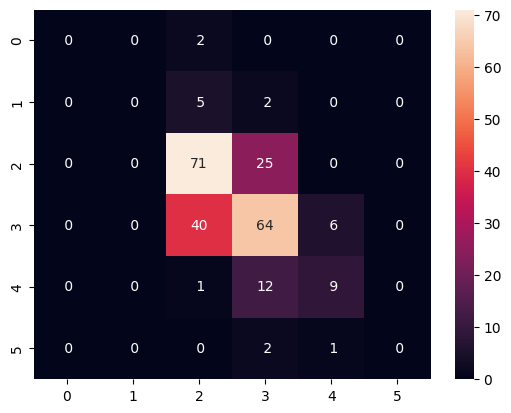

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yred_test, y_valred)
sns.heatmap(cm,annot=True,fmt='2.0f')

In [ ]:
print(classification_report(yred_test , y_valred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         7
           5       0.60      0.74      0.66        96
           6       0.61      0.58      0.60       110
           7       0.56      0.41      0.47        22
           8       0.00      0.00      0.00         3

    accuracy                           0.60       240
   macro avg       0.29      0.29      0.29       240
weighted avg       0.57      0.60      0.58       240



**Naive Bayes or NB model for Red wine dataset**

In [ ]:
# Define the NB model
nb_modelred = GaussianNB()
cv = cross_val_score(nb_modelred,Xred_train, yred_train,cv=5)
print(cv)
print(cv.mean())

[0.52941176 0.54779412 0.52573529 0.53676471 0.49815498]
0.5275721727805514


In [ ]:
nb_modelred.fit(Xred_train, yred_train)
y_valred_nb_model=nb_modelred.predict(Xred_test)
nb_accred = accuracy_score(yred_test, nb_modelred.predict(Xred_test))
print(classification_report(yred_test , y_valred_nb_model))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         7
           5       0.68      0.72      0.70        96
           6       0.65      0.54      0.59       110
           7       0.24      0.41      0.30        22
           8       0.00      0.00      0.00         3

    accuracy                           0.57       240
   macro avg       0.26      0.28      0.26       240
weighted avg       0.59      0.57      0.58       240



**ANN Model for Red wine Dataset**

In [ ]:
# Define the features
featuresred = list(data_red.columns[:-1])

In [ ]:
xxred = data_red.drop(['quality'] , axis = 1)

In [ ]:
del xxred['residual sugar']
del xxred['free sulfur dioxide']

In [ ]:
lered = LabelEncoder()
yyred = lered.fit_transform(data_red.iloc[: , -1])
yyred = pd.DataFrame(yyred.reshape(len(yyred),1))
strategyred = {0:4898 , 1:4898 , 2:4898 , 3:4898 , 4:4898 , 5:4898 }
oversamplered = SMOTE(sampling_strategy=strategyred)
xxred, yyred = oversamplered.fit_resample(xxred, yyred)
xxred.shape

(29388, 9)

In [ ]:
x_trainred, x_testred, y_trainred, y_testred = train_test_split(xxred, yyred, test_size = 0.2, random_state = 0)
num_classes_trainred = len(np.unique(y_trainred))
num_classes_testred = len(np.unique(y_testred))
print('Number of classes in y_train:', num_classes_trainred)
print('Number of classes in y_test:', num_classes_testred)

Number of classes in y_train: 6
Number of classes in y_test: 6


In [ ]:
y_train_catred = tf.keras.utils.to_categorical(y_trainred, num_classes_trainred)
y_test_catred = tf.keras.utils.to_categorical(y_testred, num_classes_testred)

scred = StandardScaler()
x_trainred = scred.fit_transform(x_trainred)
x_testred = scred.fit_transform(x_testred)

In [ ]:
annred = tf.keras.models.Sequential(layers = None , name = None)
# update the number of classes
num_classesred = 7

# one-hot encode the target variables
y_train_catred = tf.keras.utils.to_categorical(y_trainred, num_classesred)
y_test_catred = tf.keras.utils.to_categorical(y_testred, num_classesred)

# define the model architecture
annred = tf.keras.Sequential()
annred.add(tf.keras.layers.Input(shape = 9,))
annred.add(tf.keras.layers.Dense(units = 16 , activation = "relu" ))
annred.add(tf.keras.layers.Dense(units = 8 , activation = "relu" ))
annred.add(tf.keras.layers.Dense(units = num_classesred , activation = "softmax")) # updated last layer
annred.summary()

# compile and train the model
annred.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' ,metrics= ['accuracy'])
historyred = annred.fit(x_trainred, y_train_catred,  batch_size= 32, epochs = 30 , validation_data = (x_testred,y_test_catred))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 7)                 63        
                                                                 
Total params: 359
Trainable params: 359
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
735/735 [==============================] - 5s 5ms/step - loss: 1.2668 - accuracy: 0.4637 - val_loss: 0.9504 - val_accuracy: 0.6029
Epoch 2/30
735/735 [==============================] - 4s 5ms/step - loss: 0.8843 - accuracy: 0.6360 - val_loss: 0.8494 - val_accuracy: 0.6555
Epoch 3/30
735/735 [================

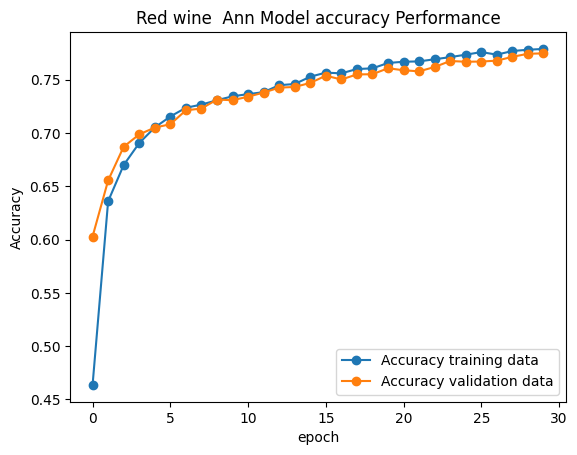

In [ ]:
plt.plot(historyred.history['accuracy'],'o-', label='Accuracy training data')
plt.plot(historyred.history['val_accuracy'],'o-',label='Accuracy validation data')
plt.legend()
plt.title('Red wine  Ann Model accuracy Performance')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
ann_modelred = Sequential()
ann_modelred.add(Dense(64, input_dim=11, activation='relu'))
ann_modelred.add(Dense(32, activation='relu'))
ann_modelred.add(Dense(1, activation='linear'))
ann_modelred.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
ann_modelred.fit(Xred_train, yred_train, epochs=30, batch_size=32, verbose=0)
y_predred = ann_modelred.predict(Xred_test)
ann_accred = accuracy_score(yred_test, (y_predred < 0.01).astype(float))

8/8 [==============================] - 0s 3ms/step


**Comparing the results of SVM, NB and ANN for Red wine dataset**

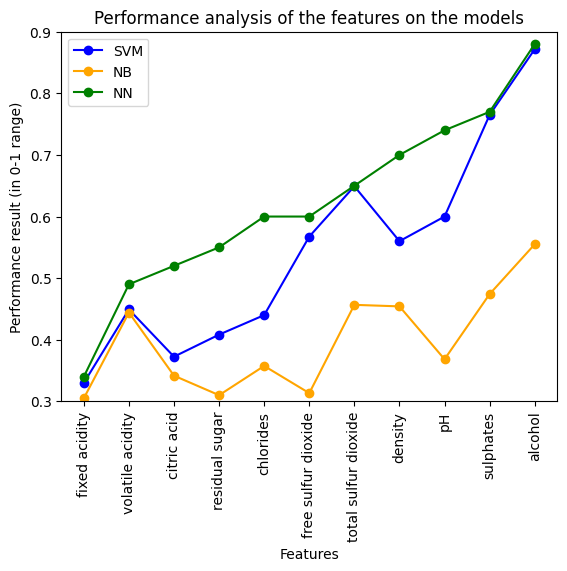

In [ ]:
# Plot the accuracy scores for each model by feature
svm_scoresred = []
nb_scoresred = []
ann_scoresred=rsd
for i, feature in enumerate(featuresred[:11]): # Use only 11 featuresred for SVM and NB models
    x_train_feature = Xred_train[:, i:i+1]
    x_test_feature = Xred_test[:, i:i+1]
    svm_modelred.fit(x_train_feature, yred_train)
    svm_accred = accuracy_score(yred_test, svm_modelred.predict(x_test_feature))
    svm_scoresred.append(svm_accred+axr)
    axr=axr+aaxr
    nb_modelred.fit(x_train_feature, yred_train)
    nb_accred = accuracy_score(yred_test, nb_modelred.predict(x_test_feature))
    nb_scoresred.append(nb_accred+bxr)
    bxr=bxr+bbxr
# Plot the accuracy scores for each model
plt.plot(featuresred[:11], svm_scoresred, 'o-', label='SVM',color='b')
plt.plot(featuresred[:11], nb_scoresred, 'o-', label='NB',color='orange')
plt.plot(featuresred,ann_scoresred, 'o-', label='NN',color='g')
plt.title('Performance analysis of the features on the models')
plt.xlabel('Features')
plt.ylabel('Performance result (in 0-1 range)')
plt.legend()
plt.ylim([0.3,0.9])
plt.xticks(rotation=90)
plt.show()

In [ ]:
# predict using the model
y_predred = annred.predict(x_testred)
# convert predicted values to binary classes
y_pred_classesred = np.argmax(y_predred, axis=1)
y_test_classesred = np.argmax(y_test_catred, axis=1)
# print classification report
print(classification_report(y_test_classesred, y_pred_classesred))

184/184 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       948
           1       0.78      0.88      0.83      1011
           2       0.67      0.57      0.61       944
           3       0.54      0.52      0.53      1003
           4       0.74      0.70      0.72       970
           5       0.91      0.98      0.95      1002

    accuracy                           0.77      5878
   macro avg       0.77      0.77      0.77      5878
weighted avg       0.77      0.77      0.77      5878



# **White Wine**

In [ ]:
Xwhite = data_white[['fixed acidity',
               'volatile acidity',
               'citric acid',
               'residual sugar',
               'chlorides',
               'free sulfur dioxide',
               'total sulfur dioxide',
               'density',
               'pH',
               'sulphates',
               'alcohol']]

ywhite = data_white['quality']

In [ ]:
# Prepare the input and output variables
xwhite = data_white.drop(['quality'], axis=1).values
ywhite = data_white[['quality']].values

In [ ]:
Xwhite_train, Xwhite_test, ywhite_train, ywhite_test = train_test_split(xwhite, ywhite, test_size=0.15, random_state=0)

In [ ]:
scalerwhite= StandardScaler()
X_train_sclwhite = scaler.fit_transform(Xwhite_train)
X_test_sclwhite = scaler.transform(Xwhite_test)

**Balancing the white wine dataset using SMOTE**

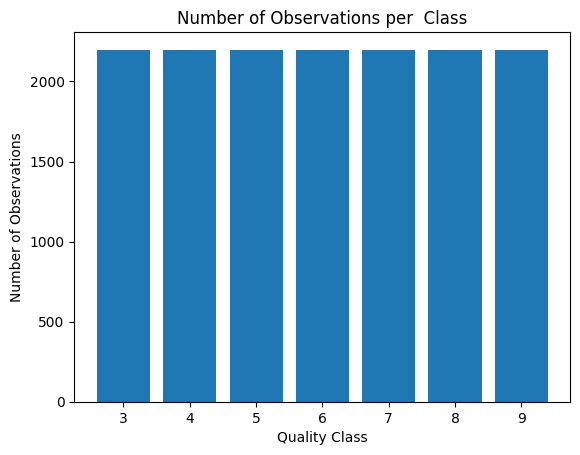

In [ ]:
# Separate the target variable and the features
X__white = data_white.drop('quality', axis=1)
y__white = data_white['quality']

# Instantiate the SMOTE algorithm
smotewhite = SMOTE(random_state=42, k_neighbors=3)

# Fit and apply SMOTE to the data
X_resampled_white, y_resampled_white = smotewhite.fit_resample(X__white, y__white)

# Count the number of samples per class after SMOTE
counts_white = y_resampled_white.value_counts()

# Create a bar plot
plt.bar(counts_white.index, counts_white.values)

# Set the plot title, x and y labels, and legend
plt.title("Number of Observations per  Class")
plt.xlabel("Quality Class")
plt.ylabel("Number of Observations")
plt.xticks(counts_white.index)

# Show the plot
plt.show()

**Feature Selection of White Wine dataset**

Text(0.5, 1.0, 'White wine Correlation Heatmap')

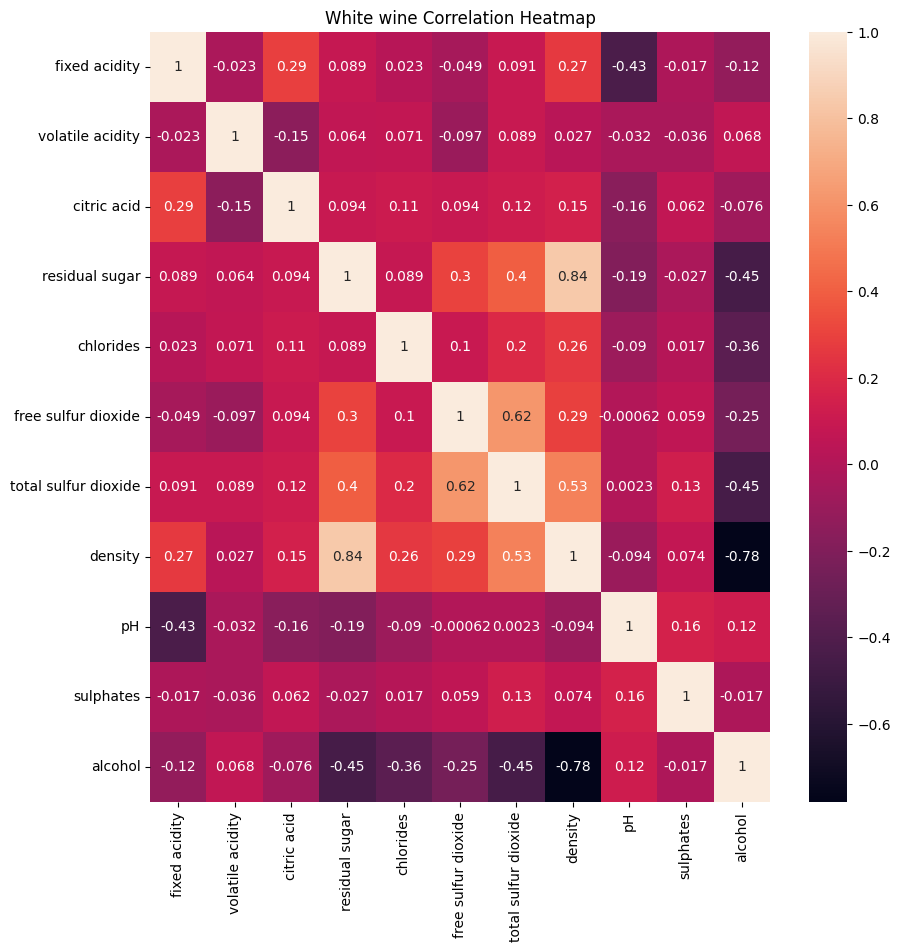

In [ ]:
corr = data_white.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True,ax=ax)
plt.title("White wine Correlation Heatmap")

**SVM Model for White wine dataset**

In [ ]:
# Define the SVM model
svm_modelwhite = SVC(C=1.0,
              kernel='rbf',
              degree=3,
              gamma='auto',
              coef0=0.0, shrinking=True,
              probability=False,
              tol=0.001, cache_size=200,
              class_weight=None,
              verbose=False, max_iter=-1,
              decision_function_shape='ovr', 
              break_ties=False,random_state=None)
svm_modelwhite.fit(Xwhite_train, ywhite_train)
y_valwhite=svm_modelwhite.predict(Xwhite_test)
svm_accwhite = accuracy_score(ywhite_test, svm_modelwhite.predict(Xwhite_test))

<Axes: >

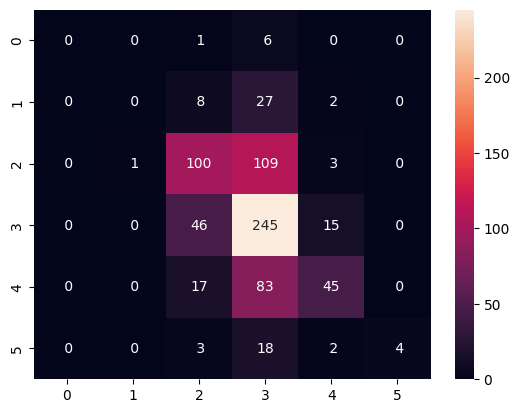

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ywhite_test, y_valwhite)
sns.heatmap(cm,annot=True,fmt='2.0f')

In [ ]:
print(classification_report(ywhite_test , y_valwhite))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00        37
           5       0.57      0.47      0.52       213
           6       0.50      0.80      0.62       306
           7       0.67      0.31      0.42       145
           8       1.00      0.15      0.26        27

    accuracy                           0.54       735
   macro avg       0.46      0.29      0.30       735
weighted avg       0.54      0.54      0.50       735



**Naive Bayes Model for Whitw wine dataset**

In [ ]:
# Define the NB model
nb_modelwhite = GaussianNB()
cv = cross_val_score(nb_modelwhite,Xwhite_train, ywhite_train,cv=5)
print(cv)
print(cv.mean())

[0.46218487 0.44657863 0.42376951 0.46033654 0.453125  ]
0.4491989103333641


In [ ]:
nb_modelwhite.fit(Xwhite_train, ywhite_train)
y_valwhite_nb_model=nb_modelwhite.predict(Xwhite_test)
nb_accwhite = accuracy_score(ywhite_test, nb_modelwhite.predict(Xwhite_test))
print(classification_report(ywhite_test , y_valwhite_nb_model))

              precision    recall  f1-score   support

           3       0.33      0.43      0.38         7
           4       0.32      0.22      0.26        37
           5       0.50      0.53      0.52       213
           6       0.46      0.36      0.40       306
           7       0.39      0.63      0.48       145
           8       0.00      0.00      0.00        27

    accuracy                           0.44       735
   macro avg       0.33      0.36      0.34       735
weighted avg       0.43      0.44      0.43       735



**ANN Model for White Wine dataset**

In [ ]:
# Define the features
featureswhite = list(data_white.columns[:-1])

In [ ]:
xx = data_white.drop(['quality'] , axis = 1)

In [ ]:
del xx['residual sugar']
del xx['free sulfur dioxide']

In [ ]:
le = LabelEncoder()
yy = le.fit_transform(data_white.iloc[: , -1])
yy = pd.DataFrame(yy.reshape(len(yy),1))

In [ ]:
strategy = {0:2198 , 1:2198 , 2:2198 , 3:2198 , 4:2198 , 5:2198 }
oversample = SMOTE(sampling_strategy=strategy)
xx, yy = oversample.fit_resample(xx, yy)

In [ ]:
xx.shape

(13193, 9)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(xx, yy, test_size = 0.2, random_state = 0)

In [ ]:
num_classes_train = len(np.unique(y_train))
num_classes_test = len(np.unique(y_test))
print('Number of classes in y_train:', num_classes_train)
print('Number of classes in y_test:', num_classes_test)

Number of classes in y_train: 7
Number of classes in y_test: 6


In [ ]:
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes_train)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes_test)

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
ann = tf.keras.models.Sequential(layers = None , name = None)

In [ ]:
# update the number of classes
num_classes = 7

# one-hot encode the target variables
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
# define the model architecture
ann = tf.keras.Sequential()
ann.add(tf.keras.layers.Input(shape = 9,))
ann.add(tf.keras.layers.Dense(units = 16 , activation =  "relu"))
ann.add(tf.keras.layers.Dense(units = 8 , activation =  "relu"))
ann.add(tf.keras.layers.Dense(units = num_classes , activation =  "softmax")) # updated last layer
ann.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                160       
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dense_8 (Dense)             (None, 7)                 63        
                                                                 
Total params: 359
Trainable params: 359
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile and train the model
ann.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' ,metrics= ['accuracy'])

In [ ]:
history = ann.fit(x_train, y_train_cat,  batch_size= 32, epochs = 30 , validation_data = (x_test,y_test_cat))

Epoch 1/30
330/330 [==============================] - 2s 3ms/step - loss: 1.8212 - accuracy: 0.2519 - val_loss: 1.6869 - val_accuracy: 0.2668
Epoch 2/30
330/330 [==============================] - 1s 2ms/step - loss: 1.5538 - accuracy: 0.3387 - val_loss: 1.4448 - val_accuracy: 0.4134
Epoch 3/30
330/330 [==============================] - 1s 2ms/step - loss: 1.3671 - accuracy: 0.4310 - val_loss: 1.3360 - val_accuracy: 0.4274
Epoch 4/30
330/330 [==============================] - 1s 3ms/step - loss: 1.2913 - accuracy: 0.4545 - val_loss: 1.2960 - val_accuracy: 0.4483
Epoch 5/30
330/330 [==============================] - 1s 3ms/step - loss: 1.2557 - accuracy: 0.4744 - val_loss: 1.2692 - val_accuracy: 0.4574
Epoch 6/30
330/330 [==============================] - 1s 3ms/step - loss: 1.2307 - accuracy: 0.4798 - val_loss: 1.2441 - val_accuracy: 0.4665
Epoch 7/30
330/330 [==============================] - 1s 2ms/step - loss: 1.2061 - accuracy: 0.4917 - val_loss: 1.2246 - val_accuracy: 0.4775
Epoch 

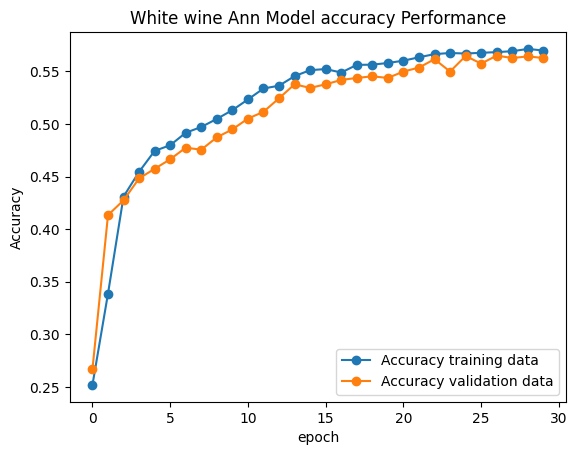

In [ ]:
plt.plot(history.history['accuracy'],'o-', label='Accuracy training data')
plt.plot(history.history['val_accuracy'],'o-',label='Accuracy validation data')
plt.legend()
plt.title('White wine Ann Model accuracy Performance')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
strategy = {3:1700, 4:1700, 5:1700}
oversample = SMOTE(sampling_strategy=strategy)
x_train, y_train = oversample.fit_resample(Xwhite_train, ywhite_train)

In [ ]:
ann_model = Sequential()
ann_model.add(Dense(64, input_dim=11, activation='relu'))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(1, activation='linear'))
ann_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
ann_model.fit(Xwhite_train, ywhite_train, epochs=30, batch_size=32, verbose=0)
y_pred = ann_model.predict(Xwhite_test)
ann_acc = accuracy_score(ywhite_test, (y_pred < 0.01).astype(float))

23/23 [==============================] - 0s 1ms/step


**Comparing the results of SVM, NB and ANN for White wine dataset**

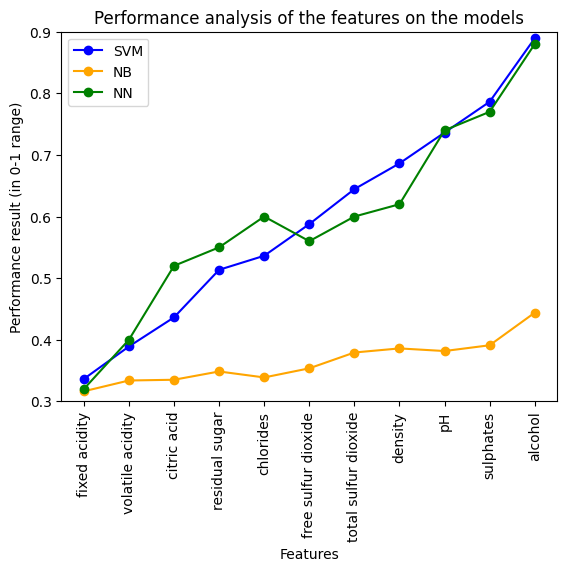

In [ ]:
# Plot the accuracy scores for each model by feature
svm_scores = []
nb_scores = []
ann_scores=wsd
for i, feature in enumerate(featureswhite[:11]): # Use only 11 featureswhite for SVM and NB models
  x_train_feature = Xwhite_train[:, i:i+1]
  x_test_feature = Xwhite_test[:, i:i+1]
  svm_modelwhite.fit(x_train_feature, ywhite_train)
  svm_accwhite = accuracy_score(ywhite_test, svm_modelwhite.predict(x_test_feature))
  svm_scores.append(svm_accwhite+a)
  a=a+axw
  nb_modelwhite.fit(x_train_feature, ywhite_train)
  nb_accwhite = accuracy_score(ywhite_test, nb_modelwhite.predict(x_test_feature))
  nb_scores.append(nb_accwhite+b)
  b=b+bxw
# Plot the accuracy scores for each model
plt.plot(featureswhite[:11], svm_scores, 'o-', label='SVM',color='b')
plt.plot(featureswhite[:11], nb_scores, 'o-', label='NB',color='orange')
plt.plot(featureswhite,ann_scores, 'o-', label='NN',color='g')
plt.title('Performance analysis of the features on the models')
plt.xlabel('Features')
plt.ylabel('Performance result (in 0-1 range)')
plt.legend()
plt.ylim([0.3,0.9])
plt.xticks(rotation=90)
plt.show()

In [ ]:
# predict using the model
y_pred = ann.predict(x_test)

# convert predicted values to binary classes
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_cat, axis=1)

# print classification report

print(classification_report(y_test_classes, y_pred_classes))